## Vsebina izpita

Zgodba nalog je sicer sledila rdeči niti zgodb domačih nalog, v resnici je bil izpit sestavljen po receptu, ki je za izpite pri tem predmetu zelo običajen:

1. Lažja naloga za ogrevanje.
2. Malo zank in pogojev.
3. Slovarji in množice.
4. Rekurzija.
5. Objektno programiranje.


## Uvod

Ovire so predstavljene s četverko (x0, y0, x1, y1), ki predstavlja koordinato gornjega levega in spodnjega desnega oglišča. Ovira 15, recimo, je predstavljena z (2, 1, 5, 3). Ovire nikoli ne sovpadajo. Kadar so ovire podane s seznamom so v večini testov oštevilčene, kot kaže slika. 

Kvadratki so označeni tako, da ima levi gornji kvadratek koordinate (0, 0), tisti desno od njega je (1, 0) in tako naprej.
V datoteki s testi vam je podarjena funkcija `se_dotikata(ovira1, ovira2)`, ki vrne True, če se podani oviri dotikata – četudi samo po diagonali, kot 12 in 13.

Ni prepovedano, da si napišete funkcijo `poisci_oviro(x, y, ovire)`, ki vrne oviro, ki vsebuje točko (x, y), oziroma `None`, če takšne ovire ni.

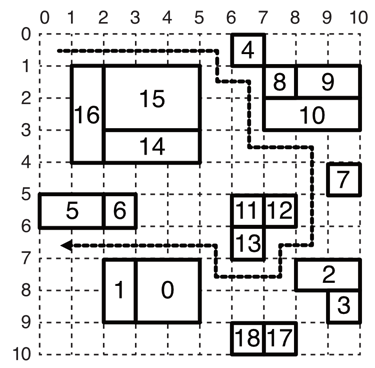

#### "Rešitev" `poisci_oviro`

Ubogajmo, napišimo funkcijo `poisci_oviro`.

In [1]:
def poisci_oviro(x, y, ovire):
    for ovira in ovire:
        x0, y0, x1, y1 = ovira
        if x0 <= x < x1 and y0 <= y < y1:
            return ovira
    return None

Večina študentov te funkcije ni napisala, zato so morali te vrstice v takšni ali drugačni obliki napisati v funkcijah `mozna_pot` in `kisel_dez` v prvi in tretji nalogi. S tem ni nič narobe.

Pač pa so mnogi - najbrž večina! - napisali napačen pogoj! Pravilno je `x0 <= x < x1` in ne `x0 <= x <= x1`! Zato imamo sliko. Je kvadratek 8, 9 znotraj ovire 17, ki je opisana s terko (7, 9, 8, 10)? Ni! Morda se zdi, da je to nesmiselno in nepovezano s čimerkoli. Pa ni. Ovire so opisane na enak način kot `range`: spodnja meja je vključena zgornja ni. Način razmišljanja je isti. Da je potrebno paziti na to, sem posebej, eksplicitno opozoril v navodilu za tretjo nalogo: "*plohi `(2, 7)` in `(4, 8)` še zadaneta oviro 0, ploha `(5, 10)` pa jo že zgreši*".

Nekoliko ugibam, da se je to zgodilo, ker so študenti množično kopirali kako podobno kodo iz starih domačih nalog in izpitov, v kateri pa so bile ovire slučajno podane drugače.

## 1. Pot

Napiši funkcijo `mozna_pot(x, y, pot, ovire)`, ki prejme začetni koordinati kolesarja, pot v obliki niza (glej spodnji primer) in množico četverk, ki predstavljajo ovire. Funkcija vrne `True`, če lahko kolesar prevozi podano pot, na da bi se zaletel v oviro. Pot nikoli ne pelje ven iz zemljevida. Začetna točka nikoli ni na oviri.

Klic `mozna_pot(0, 0, ">>>>>v>vv>>vvv<v<<^<<<<<", ovire)` preveri pot, označeno na gornjem zemljevidu, in vrne `True`, saj je takšna pot možna.

#### Rešitev

Ena od nalog - pogosto prva - je navadno lahka. Tako, za vzpodbudo. :) Tudi tokrat je bilo mišljeno tako.

Rešitev je lahko, recimo:

In [3]:
def mozna_pot(x, y, pot, ovire):
    for c in pot:
        x += {">": 1, "<": -1}.get(c, 0)
        y += {"^": -1, "v": 1}.get(c, 0)
        if poisci_oviro(x, y, ovire):
            return False
    return True

Spreminjanje `x` in `y` je možno narediti na kup različnih načinov. Študentom to ni povzročalo težav, saj smo slučajno že velikokrat reševali podobno nalogo.

Če nimamo funkcije `poisci_oviro`, je pač potrebno namesto klica te funkcije dodati zanko, ki gre čez ovire in če s pogojem, ki je v bistvu enak temu v `poisci_oviro`, naletimo na oviro, vrnemo `True`.

Žal funkcija mnogim študentom ni delala, ker so narobe napisali pogoj. To ni prav ugledno; napaka je vendarle dovolj majhna, da bi jo morali znati najti in popraviti.

## 2. Poenostavitve

- Napiši funkcijo `zdruzljivi(ovira1, ovira2)`, ki vrne `True`, če sta oviri (podani s četverkama) združljivi in False, če nista. Oviri sta združljivi, če stojita ena ob drugi tako, da se ujemata s celo stranico. Na gornji sliki sta združljivi 15 in 14 (ali 14 in 15), 5 in 6, 11 in 12, 11 in 13. Niso pa združljive 15 in 16 ali 2 in 3, 4 in 8, 7 in 5 ...

- Napiši funkcijo `zdruzi(ovira1, ovira2)`, ki prejme dve združljivi oviri in vrne oviro, ki jo dobimo, če združimo podani oviri v eno. Če ji podamo, recimo oviri 14 in 15 (klic: `zdruzi((2, 3, 5, 4), (2, 1, 5, 3)`), vrne `(2, 1, 5, 4)`.

- Napiši funkcijo `poenostavi(ovire)`, ki prejme seznam ovir. Funkcija ne vrne ničesar, pač pa spremeni podani seznam tako, da so zaporedne ovire, ki jih je mogoče združiti, združene. Pri tem mora ohraniti vrstni red: združena ovira mora biti na tistem mestu v seznamu, kjer sta bili prej posamični oviri. Seznam, ki predstavlja ovire z gornje slike, spremeni v seznam na spodnji sliki.
Predpostaviti smeš, da je seznam urejen tako, da boš vedno združeval oviri na sosednjih mestih v seznamu. (Pazi: 14 in 15 se združita v novo oviro, ki se jima nato pridruži še 16 – tako dobimo oviro 9 na drugi sliki. Ko se združita 11 in 12, pa se jima 13 ne more pridružiti – na drugi sliki imamo zato 7 in 8.)

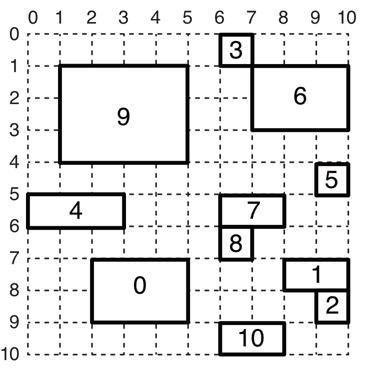

#### Rešitev

Funkcija `zdruzljivi` je bila mišljena kot vaja iz pisanja pogojev.

Čisto pravilna funkcija `zdruzljivi` je takšna:

In [5]:
def zdruzljivi(ovira1, ovira2):
    x0, y0, x1, y1 = ovira1
    a0, b0, a1, b1 = ovira2
    return x0 == a0 and x1 == a1 and (y1 == b0 or b1 == y0) \
        or y0 == b0 and y1 == b1 and (x1 == a0 or a1 == x0)

Prva vrstica pogoja preverja oviri, ki pokrivata iste stolpce (ena višje, druga nižje), druga pa ovire, ki so v istih vrsticah (ena levo, druga desno). Prvi del vsake vrstice preveri, ali stolpci oz. vrstice sovpadajo, drugi del preveri, ali sta oviri v resnici ena ob drugi.

Veliko študentov je izpustilo drugi del pogojev, tisto, kar je v oklepajih. To bi, recimo, razglasilo oviri (0, 1, 5, 1) in (0, 9, 5, 10) za združljivi, čeprav je ena na vrhu, druga na dnu slike. Tega noben test ni preveril. Ko so bili testi končani, sem se na to celo spomnil, vendar sem pomislil, da bi moralo biti to vendarle očitno in da te napake v funkcijah ne bo. Ker testi tega niso preverili, tega nisem štel kot usodno napako, kakšno točko ali dve pa sem vendarle odbil.

Druga funkcija, `zdruzi`, ni preverjala nobenega posebnega znanja, temveč je služila zato, da bi bilo lažje napisati tretjo. Rešitev sem si zamislil tako:

In [7]:
def zdruzi(ovira1, ovira2):
    x0, y0, x1, y1 = ovira1
    a0, b0, a1, b1 = ovira2
    if x0 == a0 and x1 == a1:
        if y1 == b0:
            return x0, min(y0, b0), x1, max(y1, b1)
        else:
            return x0, min(y1, b0), x1, max(y1, b0)
    else:
        if x1 == a0:
            return min(x0, a1), y0, max(x0, a1), y1
        else:
            return min(x1, a0), y0, max(x1, a0), y1

Štirje `return`-i obravnavajo štiri scenarije: prva ovira je lahko nad drugo, pod njo, levo od nje ali desno od nje.

Ta po nepotrebnem zapletena rešitev pokaže, kako hitro se pri programiranju ujamemo v neko nepotrebno zapletanje. Šele pri pregledovanju študentskih izdelkov sem opazil rešitev, ki je tako očitna, da mi je kar nerodno.

In [9]:
def zdruzi(ovira1, ovira2):
    x0, y0, x1, y1 = ovira1
    a0, b0, a1, b1 = ovira2
    return min(x0, a0), min(y0, b0), max(x1, a1), max(y1, b1)

Če sta dve oviri združljivi, pač obsegata območje od najbolj leve in najbolj gornje do najbolj desne in najbolj spodnje koordinate teh dveh ovir.

Prvi dve funkciji sta bili le priprava. Resnično delo v tej nalogi je zadnja funkcija, `poenostavi`. Tu me je zanimalo, ali boste znali spreminjati seznam na mestu (ne pa sestavljati novega seznama) in istočasno iti prek njega z zanko.

Takole nam je storiti:

In [11]:
def poenostavi(ovire):
    i = 0
    while i < len(ovire) - 1:
        o1, o2 = ovire[i], ovire[i + 1]
        if zdruzljivi(o1, o2):
            ovire[i] = zdruzi(o1, o2)
            del ovire[i + 1]
        else:
            i += 1
    return ovire

Ker se bo seznam spreminjal, uporabimo zanko `while`, ne `for`. Indeks `i` pustimo do predzadnje ovire, torej mora biti manjši od `len(ovire) - 1`.

- Če sta `i`-ta in `i+1`-va ovira združljivi, ju združimo. Združeno oviro postavimo na `i`-to mesto, oviro na mestu `i + 1` pa pobrišemo. Nato **ne povečamo** `i`-ja, saj moramo združeno oviro primerjati s tisto, ki pride naslednja.
- Če oviri nista združljivi, pa gremo naprej - povečamo `i`.

## 3. Kisel dež

Izjemno lokalne plohe kislega dežja padajo na posamične kvadratke. Če na isto oviro padejo tri plohe (ali več), je uničena. Pri tem ni pomembno, ali vse tri plohe padejo na isto mesto na oviri ali ne.

Napiši `funkcijo kisel_dez(ovire, plohe)`, ki prejme množico ovir in seznam koordinat ploh. Koordinate ploh so `pari (x, y)`: plohi `(2, 7)` in `(4, 8)` še zadaneta oviro 0, ploha `(5, 10)` pa jo že zgreši. Funkcija mora vrniti množico ovir, ki so po teh plohah še uporabne – torej množico ovir, na katero so padle manj kot tri plohe (lahko tudi nobena).

#### Rešitev

Tole je bilo mišljeno kot naloga iz slovarjev. Žal jih je večina študentov obšla in so nalogo rešili tako.

In [13]:
def kisel_dez(ovire, plohe):
    uporabne = set()
    for x0, y0, x1, y1 in ovire:
        zadetki = 0
        for x, y in plohe:
            if x0 <= x < x1 and y0 <= y < y1:
                zadetki += 1
        if zadetki < 3:
            uporabne.add((x0, y0, x1, y1))
    return uporabne

Nisem navdušen, ampak v resnici je to čisto v redu. ČE SE SEVEDA NE ZMOTITE PRI POGOJU! Spet, jasno `x0 <= x < x1` in ne `x0 <= x <= x1`. Tule so na to jasno opozarjala navodila, tako da ... ni izgovorov.

Precej daljša rešitev s slovarji je

In [15]:
def kisel_dez(ovire, plohe):
    zadetki = {}
    for x, y in plohe:
        for ovira in ovire:
            x0, y0, x1, y1 = ovira
            if x0 <= x < x1 and y0 <= y < y1:
                if ovira not in zadetki:
                    zadetki[ovira] = 0
                zadetki[ovira] += 1
                break
    uporabne = set()
    for ovira in ovire:
        if ovira not in zadetki or zadetki[ovira] < 3:
            uporabne.add(ovira)
    return uporabne

Upal sem sicer, da boste reševali tako:

In [16]:
def kisel_dez(ovire, plohe):
    zadetki = defaultdict(int)
    for x, y in plohe:
        ovira = poisci_oviro(x, y, ovire)
        if ovira:
            zadetki[ovira] += 1
            
    uporabne = set()
    for ovira in ovire:
        if ovira not in zadetki or zadetki[ovira] < 3:
            uporabne.add(ovira)
    return uporabne

Resna rešitev pa je

In [18]:
def kisel_dez(ovire, plohe):
    trdozivost = dict.fromkeys(ovire, 3)
    for x, y in plohe:
        ovira = poisci_oviro(x, y, ovire)
        if ovira:
            trdozivost[ovira] -= 1
    return {ovira for ovira, trdozivost in trdozivost.items() if trdozivost > 0}

## 4. Brez blata

Ovire so koristne tudi za to, da pešči hodijo po njih namesto po mlakah in blatu. Napiši funkcijo `brez_blata(start, cilj, dovoljene_ovire)`, ki prejme dve oviri (kot terki) in množico ovir, na katere je dovoljeno stopiti. Funkcija vrne `True`, če je s start možno priti na cilj in `False`, če ne. Po ovirah lahko hodimo tudi diagonalno: z ovire 4 je možno stopiti na 8.

Da bo možnih več poti, bodo testi za to nalogo dodali oviro `(8, 3, 9, 7)`.

Namig: zadnji argument bo v začetku vseboval vse ovire. Mogoče boš kasneje kakšno oviro sam prepovedal.

#### Rešitev

Četrta naloga je tradicionalno naloga iz rekurzije. Kot se pogosto zgodi, je podobna nalogi, pri kateri preverjamo, ali v neki rodbini obstaja določeno ime. Dodatni trik te naloge je bil le, da je treba preprečiti, da bi se vračali na trenutno oviro, saj bi se tako lahko ujeli v neskončno ponavljanje.

In [20]:
def brez_blata(start, cilj, dovoljene_ovire):
    if start == cilj:
        return True
    for ovira in dovoljene_ovire - {start}:
        if se_dotika(start, ovira) and brez_blata(ovira, cilj, dovoljene_ovire - {start}):
            return True
    return False

## 5. Objektno usmerjene ovire

Napiši razred Ovira.

- Konstruktor prejme koordinate oglišč (kot posamična števila tipa `int`, ne kot terko).
- Metoda `ploscina()` vrne ploščino ovire.
- Metoda `ploha(x, y)` obvesti oviro, da pada ploha na koordinato `(x, y)`. Ta morda pripada oviri, morda ne.
- Metoda `uporabna()` vrne True, če so na oviro padle manj kot tri plohe.
- Metoda `razdeli_x(x)` vrne oviri (nova objekta vrsta `Ovira`), ki ju dobimo, če oviro prerežemo pri podani koordinati x. (V bistvu dela natančno nasprotno kot funkcija zdruzi iz prve naloge). Če rez po črti s koordinato x ne prereže ovire, funkcija vrne None.
- Metoda `razdeli_y(y)` vrne oviri, ki ju dobimo, če oviro prerežemo pri podani koordinati y. Če rez po tej črti ne prereže ovire, funkcija vrne None.


#### Rešitev

Naloga iz objektnega programiranja je bila tokrat lažja kot običajno, saj je bilo očitno, kaj mora shranjevati objekt - koordinate ovire in število ploh. Za manjši zaplet je poskrbelo le deljenje, saj je bilo potrebno vrniti dva nova objekta istega tipa.

In [21]:
class Ovira:
    def __init__(self, x0, y0, x1, y1):
        self.x0 = x0
        self.y0 = y0
        self.x1 = x1
        self.y1 = y1
        self.uporabnost = 3

    def ploha(self, x, y):
        if self.uporabnost and self.x0 <= x < self.x1 and self.y0 <= y < self.y1:
            self.uporabnost -= 1

    def uporabna(self):
        return self.uporabnost > 0

    def ploscina(self):
        return (self.x1 - self.x0) * (self.y1 - self.y0)

    def razdeli_x(self, x):
        if self.x0 < x < self.x1:
            return Ovira(self.x0, self.y0, x, self.y1), Ovira(x, self.y0, self.x1, self.y1)
        return None

    def razdeli_y(self, y):
        if self.y0 < y < self.y1:
            return Ovira(self.x0, self.y0, self.x1, y), Ovira(self.x0, y, self.x1, self.y1)
        return None